In [58]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras import regularizers
import pickle
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.utils import shuffle

In [82]:
(x_train, y_train) , (x_test, y_test)=keras.datasets.mnist.load_data()
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)


In [78]:
len(x_train)

60000

In [79]:
x_train[0].shape

(28, 28)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[3 1 4 ... 7 1 4]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0

In [33]:
# Shaping the datasets
n_sample, nx, ny = x_train.shape
n_sample_test, nx_test, ny_test = x_test.shape
clean_datasets = x_train.reshape((n_sample, nx*ny))
clean_x_test = x_test.reshape((n_sample_test, nx_test*ny_test))

In [15]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 156, 254, 254, 254, 254,
        254, 254, 164, 125,  45,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5, 155, 253, 253, 253,
        253, 253, 253, 253, 250, 222,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
print(x_train[0])

[ 0.          0.          0.          0.          0.         -0.38988724
 -0.38305146 -0.34728985 -0.39753564 -0.59744039 -0.63813202 -0.69903
 -0.68768994 -0.76461859 -0.81077526 -0.82797778 -0.98295804 -1.01774541
 -0.85887377 -0.53062051 -0.37964354  0.          0.          0.
  0.          0.          0.          0.        ]


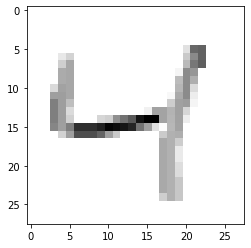

In [20]:
plt.imshow(x_train[2], cmap=plt.cm.binary)
plt.show()


In [34]:
# Shaping the datasets
n_sample, nx, ny = x_train.shape
n_sample_test, nx_test, ny_test = x_test.shape
clean_datasets = x_train.reshape((n_sample, nx * ny))
clean_x_test = x_test.reshape((n_sample_test, nx_test * ny_test))


In [37]:
# Start training
svm = LinearSVC()
svm.fit(clean_datasets, y_train)
print(svm.score(clean_datasets, y_train))  # Printing the accuracy


0.9266666666666666


In [38]:
svm = LinearSVC(dual=False)
svm.fit(clean_datasets, y_train)

LinearSVC(dual=False)

In [46]:
def save_model(model_obj):
    """
    For saving the model
    :param model_obj: AI algorithm.
    :return: None
    """
    file = open("mnist.pickle", "wb")
    pickle.dump(model_obj, file)
    return None

In [47]:
def prediction(data):
    """
    Making prediction.
    :returns: list of predicted number
    :param data: Input data or testing data
    :return: list
    """
    file = open("mnist.pickle", "rb")
    model = pickle.load(file)
    predict = model.predict(data)
    return predict

In [49]:
def visualization(data, y=None):
    """
    For Visualize the data
    :param y: If y doesn't provided then by default it is None
    :param data: X dataset
    :return: None
    """
    for i in range(len(data)):
        pyplot.imshow(data[i], cmap=pyplot.cm.get_cmap("binary"))
        if y:
            try:
                print(y[i])
            except Exception:
                pass
        pyplot.show()
    return None

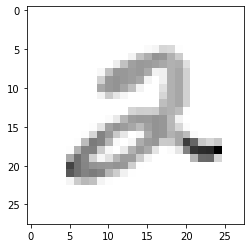

In [85]:
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.show()